In [1]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import numpy as np

from database_processing_functions import *
from create_data_matrix import *
import matplotlib.pyplot as plt

# Plot Surrogate Predictions
from gp_predict import *
from diff_evolution_col import *
import matplotlib.pyplot as plt
import seaborn as sns

# This code is to plot the surrogate model

# Load the merged_calibration_data.csv
df = pd.read_csv('merged_calibration_data.csv')
df.head()

,eta1,kappa_k,kappa,sig,lam,mup,sigp,rsmax,n,alpha,...,name,PeakDrift,FailureType,ar,lrr,srr,alr,sdr,smr,data_type
0,1.268766,0.560342,0.989811,0.422157,0.508888,0.289958,0.655478,0.538570,6.108898,0.013199,...,"BRI No. 2 (Japan), spbaa1",0.035949,Flexure,0.166667,0.375176,0.002801,0.104919,1.157143,0.217488,train
1,1.302573,0.664521,1.019830,0.295417,0.379802,0.197480,0.396008,0.541934,6.798783,0.010121,...,"Vu et al. 1998, NH1",0.051059,Flexure,0.166667,0.293255,0.002958,0.148193,1.000000,0.310284,train
2,1.081939,1.690771,0.998811,0.344018,0.469761,0.716281,1.547362,0.550237,1.718216,0.008190,...,"Saatcioglu and Baingo 1999, RC4",0.044438,Flexure,0.151976,0.152553,0.012636,0.418754,0.900000,0.213547,train
3,0.519748,1.073142,1.006206,0.373530,0.341981,0.334443,0.679440,0.983444,2.987563,0.000982,...,"Arakawa et al. 1988, No. 16",0.035076,Flexure,0.611111,0.460800,0.007761,0.000000,0.480000,0.769404,train
4,0.707529,1.838275,1.049884,0.204735,0.383226,3.123346,2.097244,0.557611,5.624242,0.001463,...,"Lehman et al. 1998, 415",0.073409,Flexure,0.125000,0.448760,0.006615,0.281132,0.750000,0.333087,train


In [2]:
# Define surrogate model parameters and code

# ------
# Here, call surrogate model for flexure failure
# ------
f_surrogate_dir = r'C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\flexure_pd_010_just_good_data'
f_template_dir = os.path.join(f_surrogate_dir, 'templatedir_SIM')
f_surrogate_file = f_surrogate_dir + r'\SimGpModel.json'

# ------
# Here, call surrogate model for shear failure
# ------
s_surrogate_dir = r'C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\combined_pd_005_just_good_data'
s_template_dir = os.path.join(f_surrogate_dir, 'templatedir_SIM')
s_surrogate_file = s_surrogate_dir + r'\SimGpModel.json'

# Input_json is the same for both cases
input_json = r'C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json'

In [3]:
# For all the cases in the dataset, get BW model predictions from the surrogate
predicted_params = pd.DataFrame(columns = df.columns[0:14])
predicted_variances = pd.DataFrame(columns = df.columns[0:14])

for ii in range(len(df)):
    name = df['name'][ii]
    
    # Extract the calibrated and nondimensional parameters for both training and testing
    cal_params = df.iloc[ii, 0:14]
    nondim_params = df.iloc[ii, 17:23]
    
    params_list = [["RV_column1", nondim_params.iloc[0]],
               ["RV_column2", nondim_params.iloc[1]],
               ["RV_column3", nondim_params.iloc[2]],
               ["RV_column4", nondim_params.iloc[3]],
               ["RV_column5", nondim_params.iloc[4]], 
               ["RV_column6", nondim_params.iloc[5]]
               ]
    
    # Here, call surrogate model
    try:
        # Select the surrogate model
        if df['FailureType'][ii] == 'Flexure':
            print('Flexure-type failure')
            surrogate_file = f_surrogate_file
        else:
            print('Shear-type failure')
            surrogate_file = s_surrogate_file

        params, variance = main(params_list, [], surrogate_file, 'dummyout.out', input_json)
        params = pd.DataFrame(params, columns = df.columns[0:14])
        variance = pd.DataFrame(variance, columns = df.columns[0:14])

        predicted_params = pd.concat([predicted_params, params])
        predicted_variances = pd.concat([predicted_variances, variance])
    
    except Exception as e:
        print('Error in surrogate model', e)
        params = pd.DataFrame(np.nan*np.array(params), columns = df.columns[0:14])
        variance = pd.DataFrame(np.nan*np.array(variance), columns = df.columns[0:14])
        
        predicted_params = pd.concat([predicted_params, params])
        predicted_variances = pd.concat([predicted_variances, variance])
        continue


Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type failure
Flexure-type 

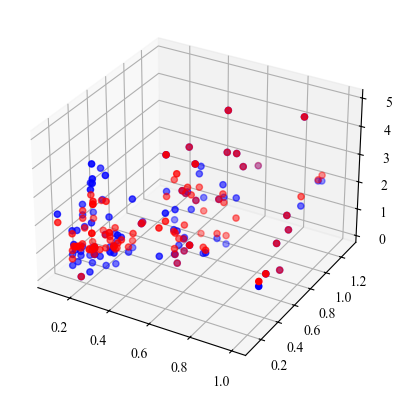

In [13]:
# Plot ar, all vs BW model predictions
# Pick two: 
# (0) ar 
# (1) lrr 
# (2) srr 
# (3) alr 
# (4) sdr
# (5) smr

xvar = 'ar'
yvar = 'smr'

xvals = df[xvar]
yvals = df[yvar]

# Select index for the parameter of interest...
par_index = 6

# Calibrated parameter
zvals = df.iloc[:, par_index]

# Surrogate prediction
bwpar = predicted_params.iloc[:, par_index]

# 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xvals, yvals, bwpar, c='r', marker='o', label='Surrogate')
ax.scatter(xvals, yvals, zvals, c='b', marker='o', label='Calibrated')

In [9]:
nondim_params_all = df.iloc[:, 17:23]
nondim_params_all.median()

ar     0.343017
lrr    0.338050
srr    0.003861
alr    0.102899
sdr    0.900000
smr    0.416794
dtype: float64

100%|██████████| 30/30 [01:01<00:00,  2.04s/it]


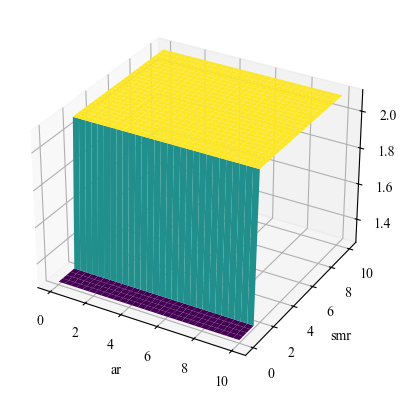

In [17]:
# Now, lets generate a grid of values for nondimensional parameters 
from tqdm import tqdm

# Define the grid
x = np.linspace(0.01, 10, 30)
y = np.linspace(0.01, 10, 30)
X, Y = np.meshgrid(x, y)

Z = np.zeros(X.shape)

# Evaluate the surrogate model on the values of the grid

for ii in tqdm(range(len(x))):
    for jj in range(len(y)):

        # Generate a list of parameters
        params_list = [["RV_column1", x[ii]],
                ["RV_column2", nondim_params_all.median()[1]],
                ["RV_column3", nondim_params_all.median()[2]],
                ["RV_column4", nondim_params_all.median()[3]],
                ["RV_column5", nondim_params_all.median()[4]], 
                ["RV_column6", y[ii]]
                ]
        
        # Simple model for classification of failure mode
        if y[ii] > 1.5:
            failuretype = 'Shear'
        else:
            failuretype = 'Flexure'

        # Here, call surrogate model
        try:
            # Select the surrogate model
            if failuretype == 'Flexure':
                # print('Flexure-type failure')
                surrogate_file = f_surrogate_file
            else:
                # print('Shear-type failure')
                surrogate_file = s_surrogate_file

            params, variance = main(params_list, [], surrogate_file, 'dummyout.out', input_json)
            params = pd.DataFrame(params, columns = df.columns[0:14])
            # variance = pd.DataFrame(variance, columns = df.columns[0:14])

            #predicted_params = pd.concat([predicted_params, params])
            #predicted_variances = pd.concat([predicted_variances, variance])
            Z[ii, jj] = params.iloc[0, par_index]

        except Exception as e:
            print('Error in surrogate model', e)
            params = pd.DataFrame(np.nan*np.array(params), columns = df.columns[0:14])
            variance = pd.DataFrame(np.nan*np.array(variance), columns = df.columns[0:14])
            
            predicted_params = pd.concat([predicted_params, params])
            predicted_variances = pd.concat([predicted_variances, variance])

            Z[ii, jj] = np.nan

            continue

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('ar')
ax.set_ylabel('smr')
ax.set_zlabel('bwpar')
plt.show()

